# **Content**
1. [Load and chech Data](#1)
1. [Veriable Description](#2)
1. [Data cleaning](#3)
    * [Rename columns](#6)
    * [Removal and organization of useless data](#7)
        * [Detection of NaN and Fill Data with Average](#8)
            * [Fill the missing value Height and weight columns](#9)
            * [Fill the missing value Age column](#10)
            
1. [Univariate Veriable Analysis](#4)
    * [Numeric Veriables](#11)
    * [Categorical Veriables](#12)
1. [Bivariate data analysis](#5)
 * [Height and weight comparison by gender](#13)
 * [Examining the relationship between numeric columns](#14)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid') #plt.style.available

import warnings #ignore warning
warnings.filterwarnings("ignore")
from collections import Counter

In [2]:
df = pd.read_csv("../datasets/athlete_events.csv")
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

<a id="1"></a>
# Load And Check Data

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<a id="2"></a>
# Veriable Description

1. ID: Unique number of each athlete
1. Name: Athlete name
1. Sex: Gender -> m(man) - f(woman)
1. Age
1. Height
1. Weight
1. Team
1. NOC: National olympic committee (3 letter code)
1. Games: Year and season
1. Year
1. Season: Winter, Summer
1. City: city where the event is held
1. Sport: General event branch
1. Event: Specific event name
1. Medal: Type of medal won -> Gold, Bronze, Silver, nan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Types of variable
1. int64: ID, Year
1. float64: Age, Height, Weight
1. object(string): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal

<a id="3"></a>
# Data Cleaning
* Rename columns
* Removal and organization of useless data
* Detection of NaN(lost) data

<a id="6"></a>
## Rename columns 

In [7]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [8]:
df.rename(columns={'ID': 'id',
                  'Name' : 'name',
                  'Sex': 'gender',
                  'Age': 'age',
                  'Height': 'height',
                  'Weight': 'weight',
                  'Team': 'team',
                  'NOC': 'noc',
                  'Games': 'games',
                  'Year': 'year',
                  'Season': 'season',
                  'City': 'city',
                  'Sport': 'sport',
                  'Event': 'event',
                  'Medal': 'medal'},inplace=True)

In [9]:
df.head()

,id,name,gender,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<a id="7"></a>
## Removal and organization of useless data

In [10]:
df = df.drop(["id","games"],axis=1) # axis = 1 -> columns
df.head(2)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


<a id="8"></a>
## Detection of NaN and Fill Data with Average
* Filling in the missing data in the height and weight column is based on the event average.

In [11]:
unique_event = pd.unique(df.event)
print("Unique event number: ", len(unique_event))
#Example
unique_event[:10]

Unique event number:  765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

<a id="9"></a>
## Fill the missing value Height and weight columns

In [12]:
# loop each activity iteratively
# find average height and weight for the event
# equate the lost height and weight values to the activity averages
temp_df = df.copy() # Temporary data was created to avoid corrupting the actual data.
height_weight_list = ["height","weight"]
for e in unique_event:
    # event filter created
    event_filter = temp_df.event == e
    # filter data according to event
    data_filter = temp_df[event_filter]
    # average height and weight
    for s in height_weight_list:
        average = np.round(np.mean(data_filter[s]),2)
        if not np.isnan(average):
            data_filter[s] = data_filter[s].fillna(average)
        else:
            all_data_average = np.round(np.mean(df[s]),2)
            data_filter[s] = data_filter[s].fillna(all_data_average)
    temp_df[event_filter] = data_filter

In [13]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     261642 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [14]:
df = temp_df.copy()

<a id="10"></a>
## Fill the missing value Age column

In [15]:
temp_df = df.copy()
average = np.round(np.mean(temp_df["age"]),1)
temp_df["age"] = temp_df["age"].fillna(average)
print("Average age: ",average)
temp_df.info() 

Average age:  25.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     271116 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [16]:
df = temp_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     271116 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [17]:
print("Number of athletes who did not receive medals: ",df["medal"].isnull().sum())
medal_filter = ~df["medal"].isnull()
df = df[medal_filter]

Number of athletes who did not receive medals:  231333


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    39783 non-null  object 
 1   gender  39783 non-null  object 
 2   age     39783 non-null  float64
 3   height  39783 non-null  float64
 4   weight  39783 non-null  float64
 5   team    39783 non-null  object 
 6   noc     39783 non-null  object 
 7   year    39783 non-null  int64  
 8   season  39783 non-null  object 
 9   city    39783 non-null  object 
 10  sport   39783 non-null  object 
 11  event   39783 non-null  object 
 12  medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [19]:
# Save clean data
#df.to_csv("../datasets/clean_athlete_events.csv",index=False)

<a id="4"></a>
# Univariate Veriable Analysis
* Numeric Veriables: 
    1. age
    1. height
    1. weight
    1. year
* Categorical Veriables: 
    1. name
    1. gender
    1. team
    1. noc
    1. season
    1. city
    1. sport
    1. event
    1. medal

<a id="11"></a>
## Numeric Veriables

In [20]:
def plotHistogram(veriable):
    """
        input = column name
        output = histogram plot
    """
    plt.figure()
    plt.hist(df[veriable],bins=85,color="orange")
    plt.xlabel(veriable.upper())
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {veriable}")
    plt.show    

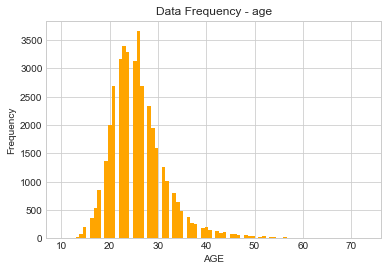

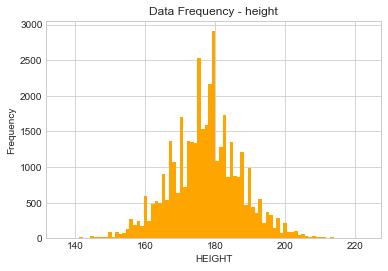

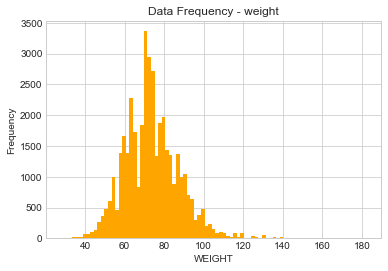

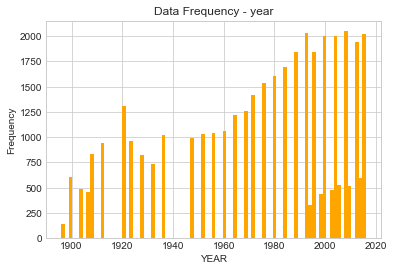

In [21]:
category = ['age','height','weight','year']
for c in category:
    plotHistogram(c)

In [22]:
#tatistical properties of numerical data
df.describe()

,age,height,weight,year
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.919192,177.336690,73.738320,1973.943845
std,5.859527,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


In [23]:
#box plot for age veriable
def plotBoxGraph(veriable):
    """
        input: Veriable/Column name
        output: Box graph
    """
    plt.boxplot(df[veriable])
    plt.title(f"Box plot for {veriable} veriable")
    plt.xlabel(veriable)
    plt.ylabel('Value')
    plt.show()

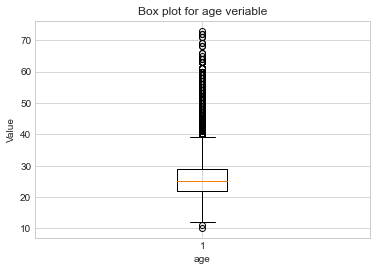

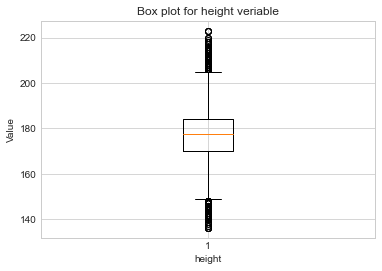

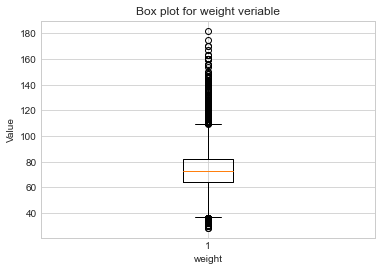

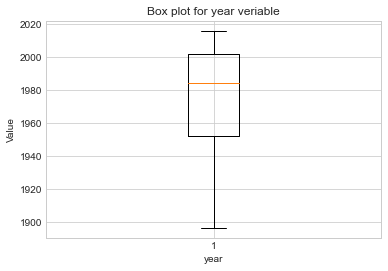

In [24]:
for c in category:
    plotBoxGraph(c)

<a id="12"></a>
## Categorical Veriables

In [25]:
def plotBar(veriable,n=5):
    """
        input: 
            veriable:Veriable/Column name
            n: unique value to display
        output: Box plot & value count
    """
    #get feature and count number of categorical veriable
    varValue = df[veriable].value_counts()
    varValue = varValue[:5]
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue,color="orange")
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.title(veriable)
    plt.show()
    
    print(f"{veriable}\n{varValue}")

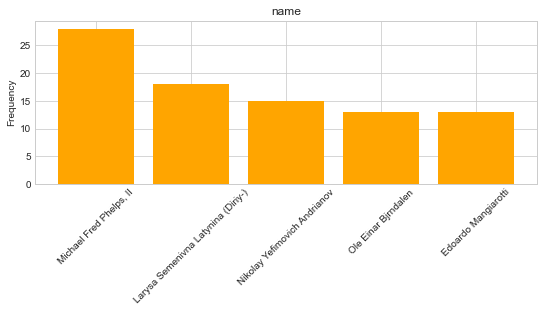

name
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: name, dtype: int64


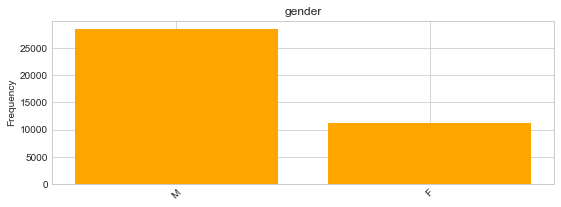

gender
M    28530
F    11253
Name: gender, dtype: int64


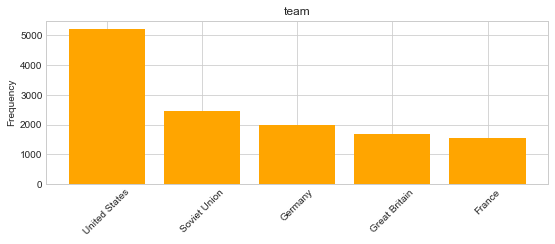

team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: team, dtype: int64


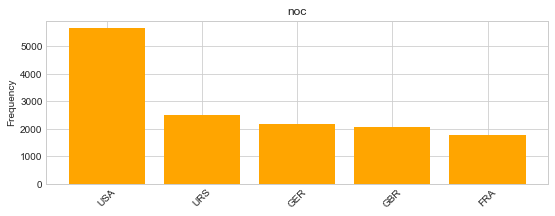

noc
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: noc, dtype: int64


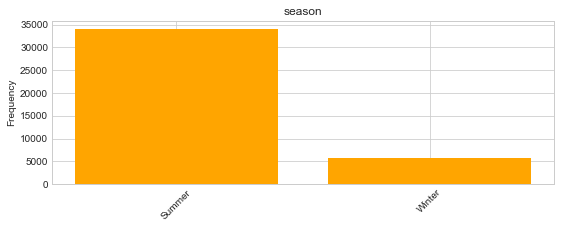

season
Summer    34088
Winter     5695
Name: season, dtype: int64


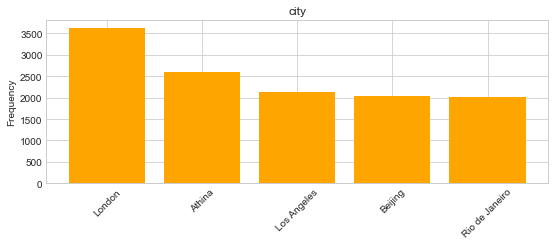

city
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: city, dtype: int64


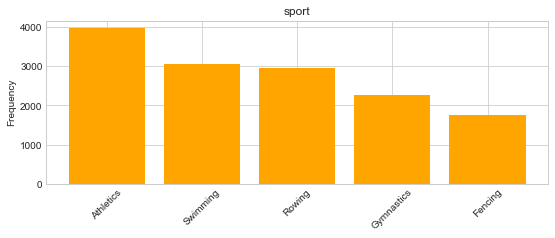

sport
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: sport, dtype: int64


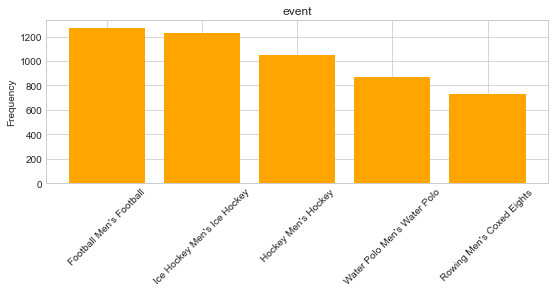

event
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: event, dtype: int64


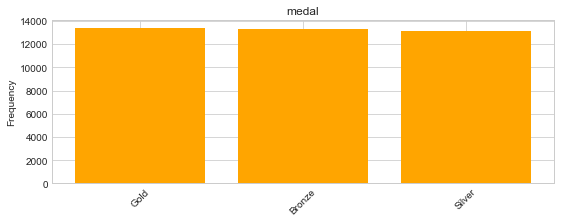

medal
Gold      13372
Bronze    13295
Silver    13116
Name: medal, dtype: int64


In [26]:
categorical = ['name','gender','team','noc','season','city','sport','event','medal']
for c in categorical:
    plotBar(c)

<a id="5"></a>
# Bivariate data analysis
 * Height and weight comparison by gender
 * Examining the relationship between numeric columns
 * Examining the relationship between medal and age
 * Number of gold, silver and bronze medals won by teams
 * In which city the medals were won
 * Number of gold, silver and bronze medals won by gender.

<a id="13"></a>
## Height and weight comparison by gender

In [27]:
male = df[df['gender'] == 'M']
male.head(3)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [28]:
female = df[df.gender == "F"]
female.head(3)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


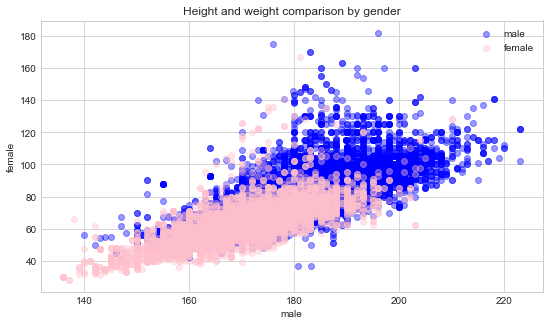

In [29]:
plt.figure(figsize=(9,5))
plt.scatter(male.height,male.weight,alpha=0.4,label = "male",color="blue") #alpha->transparency
plt.scatter(female.height,female.weight,alpha=0.4,label="female",color="pink")
plt.xlabel("male")
plt.ylabel("female")
plt.title("Height and weight comparison by gender")
plt.legend()
plt.show()

<a id="14"></a>
## Examining the relationship between numeric columns

In [30]:
corr = df.loc[:,["age","height","weight"]].corr()
corr

,age,height,weight
age,1.000000,0.061875,0.136354
height,0.061875,1.000000,0.794368
weight,0.136354,0.794368,1.000000


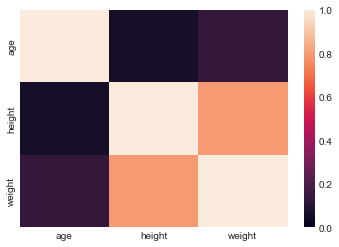

In [31]:
ax1 = sns.heatmap(corr,vmin=0,vmax=1)

## Examining the relationship between medal and age

In [32]:
temp_df = df
temp_df = pd.get_dummies(temp_df,columns=["medal"])
temp_df.head(3)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal_Bronze,medal_Gold,medal_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [33]:
corr = temp_df.loc[:,["age","medal_Bronze","medal_Silver","medal_Gold"]].corr()
corr
# There is no correlation between medal and age

,age,medal_Bronze,medal_Silver,medal_Gold
age,1.000000,-0.005568,0.008212,-0.002612
medal_Bronze,-0.005568,1.000000,-0.496859,-0.504110
medal_Silver,0.008212,-0.496859,1.000000,-0.499022
medal_Gold,-0.002612,-0.504110,-0.499022,1.000000


## Number of gold, silver and bronze medals won by teams

In [34]:
temp_df.loc[:,["team","medal_Bronze","medal_Silver","medal_Gold"]].groupby(["team"],as_index=False).sum().sort_values(by="medal_Gold",ascending=False)[:10]

,team,medal_Bronze,medal_Silver,medal_Gold
462,United States,1233.0,1512.0,2474.0
403,Soviet Union,677.0,716.0,1058.0
165,Germany,678.0,627.0,679.0
215,Italy,484.0,508.0,535.0
171,Great Britain,572.0,582.0,519.0
149,France,577.0,518.0,455.0
420,Sweden,507.0,476.0,451.0
198,Hungary,365.0,330.0,432.0
67,Canada,408.0,413.0,422.0
117,East Germany,263.0,309.0,369.0


## In which city the medals were won

In [35]:
temp_df.loc[:,["city","medal_Gold","medal_Silver","medal_Bronze"]].groupby(by="city").sum().sort_values(by="medal_Gold",ascending=False)[:10]

,medal_Gold,medal_Silver,medal_Bronze
city,,,
London,1215.0,1195.0,1214.0
Athina,883.0,859.0,860.0
Los Angeles,726.0,691.0,706.0
Beijing,671.0,667.0,710.0
Rio de Janeiro,665.0,655.0,703.0
Sydney,663.0,661.0,680.0
Atlanta,608.0,605.0,629.0
Barcelona,559.0,549.0,604.0
Seoul,520.0,513.0,549.0


## Number of gold, silver and bronze medals won by gender.

In [36]:
gender_df = temp_df.loc[:,["gender","medal_Gold","medal_Silver","medal_Bronze"]].groupby(by="gender").sum().sort_values(by="medal_Gold",ascending=False)[:10]
gender_df["total_medal"] = gender_df["medal_Gold"] + gender_df["medal_Silver"] + gender_df["medal_Bronze"]
gender_df

,medal_Gold,medal_Silver,medal_Bronze,total_medal
gender,,,,
M,9625.0,9381.0,9524.0,28530.0
F,3747.0,3735.0,3771.0,11253.0


# Multivariate data analysis

In [37]:
df_pivot = df.pivot_table(index="medal",columns="gender",values=["height","weight","age"],aggfunc={"height":np.mean,"weight":np.mean,"age":[min,max,np.mean,np.std]})
df_pivot

age                                                              \
         max             mean              min             std             
gender     F     M          F          M     F     M         F         M   
medal                                                                      
Bronze  69.0  72.0  24.710634  26.333431  12.0  10.0  5.329243  5.870188   
Gold    63.0  64.0  24.373579  26.491013  13.0  13.0  5.219623  5.987715   
Silver  55.0  73.0  24.446747  26.601364  11.0  13.0  5.253125  6.098015   

            height                 weight             
              mean                   mean             
gender           F           M          F          M  
medal                                                 
Bronze  170.003227  180.045806  62.757125  77.841504  
Gold    170.448727  180.318906  63.199349  78.186505  
Silver  170.233783  180.053626  62.866892  77.960887

# Anomaly Detection

In [38]:
def anomalyDetection(df,veriable):
    """
        input: 
            df: dataframe
            veriable: feature
        output:
    """
    outlier_indices = []
    
    for c in veriable:
        #first quartile
        Q1 = np.percentile(df[c],25)
        #third quartile
        Q3 = np.percentile(df[c],75)
        #Inter Quantile Range
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        #Outlier value and index
        outlier_list = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        #detection indices
        outlier_indices.extend(outlier_list)
    
    #find the unique outlier
    outlier_indices = Counter(outlier_indices)
    #if it has more than one outlier, let's consider it as outlier
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 1)

    return multiple_outliers

In [44]:
df_anomaly = df.loc[anomalyDetection(df,["age","height","weight"])]
df_anomaly.sport.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: sport, dtype: int64

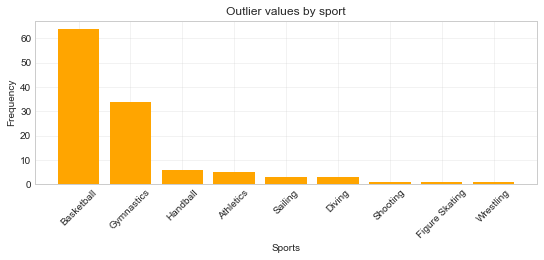

In [63]:
#vusualize
plt.figure(figsize=(9,3))
plt.bar(df_anomaly.sport.value_counts().index,df_anomaly.sport.value_counts().values,color="orange")
plt.title(f"Outlier values by sport")
plt.xlabel("Sports")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

In [64]:
df_basketball = df_anomaly[df_anomaly.sport == "Basketball"]
df_basketball.head()

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [67]:
df_gym = df_anomaly[df_anomaly.sport == "Gymnastics"]
df_gym.head()

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold


In [69]:
df_gym.event.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: event, dtype: int64

In [70]:
df_basketball.event.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: event, dtype: int64

# Data analysis in time series
* Average age, height and weight change over the years
* Number of medals by year

In [97]:
df_time = df.copy()
df_time.head()

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [98]:
unique_years = pd.unique(df_time.year)
print(len(unique_years))

35


In [99]:
sorted_years = np.sort(unique_years)
sorted_years

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

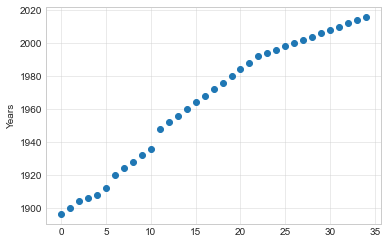

In [100]:
plt.figure()
plt.scatter(range(len(sorted_years)),sorted_years)
plt.ylabel("Years")
plt.grid(alpha=0.5)
plt.show()

In [101]:
# Year data converted to datetime type
date_time = pd.to_datetime(df_time["year"],format="%Y")
print(type(date_time))
date_time.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: year, dtype: datetime64[ns]

In [102]:
df_time["date_time"] = date_time
df_time.head(3)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal,date_time
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [103]:
#Mevcut index date_time sütunu ile degistirildi
#date_time sütunu ile year ayni veriyi tasidiklari icin year veriden cikarildi
df_time = df_time.set_index("date_time")
df_time.drop(["year"],inplace=True,axis=1)
df_time.head(3)

,name,gender,age,height,weight,team,noc,season,city,sport,event,medal
date_time,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


## Average age, height and weight change over the years

In [109]:
df_periodic = df_time.resample("2A").mean()#2 yıllık periyotlara göre ortalamaları gösterir
df_periodic.head(8) #Eksik veri olan yıllarda nan deger dondurur

,age,height,weight
date_time,,,
1896-12-31,23.917483,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.795695,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.369136,177.241091,74.330823
1906-12-31,26.492576,176.347576,74.072183
1908-12-31,27.569916,176.662419,73.721107
1910-12-31,NaN,NaN,NaN


In [112]:
df_periodic.dropna(axis=0,inplace=True)
df_periodic.head(8)

,age,height,weight
date_time,,,
1896-12-31,23.917483,174.280350,72.734056
1900-12-31,27.795695,177.882301,74.979950
1904-12-31,26.369136,177.241091,74.330823
1906-12-31,26.492576,176.347576,74.072183
1908-12-31,27.569916,176.662419,73.721107
1912-12-31,27.492242,176.890244,74.321467
1920-12-31,29.265291,176.333012,73.246437
1924-12-31,27.996466,176.658212,74.427058


<Figure size 432x288 with 0 Axes>

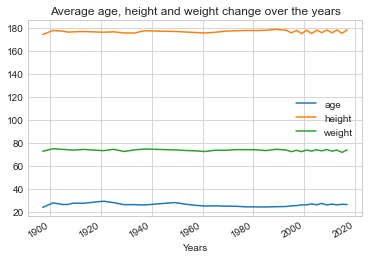

In [116]:
plt.figure()
df_periodic.plot()
plt.title("Average age, height and weight change over the years")
plt.xlabel("Years")
plt.show()

In [118]:
df_time = pd.get_dummies(df_time,columns=["medal"])
df_time.head(5)

,name,gender,age,height,weight,team,noc,season,city,sport,event,medal_Bronze,medal_Gold,medal_Silver
date_time,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [139]:
df_periodic = df_time.resample("2A").sum()
df_periodic.drop(["age","height","weight"],inplace=True,axis=1)
df_periodic.head()

,medal_Bronze,medal_Gold,medal_Silver
date_time,,,
1896-12-31,38.0,62.0,43.0
1898-12-31,0.0,0.0,0.0
1900-12-31,175.0,201.0,228.0
1902-12-31,0.0,0.0,0.0
1904-12-31,150.0,173.0,163.0


In [140]:
df_periodic = df_periodic[~(df_periodic == 0).any(axis=1)]
df_periodic.tail()

,medal_Bronze,medal_Gold,medal_Silver
date_time,,,
2008-12-31,710.0,671.0,667.0
2010-12-31,171.0,174.0,175.0
2012-12-31,679.0,632.0,630.0
2014-12-31,198.0,202.0,197.0
2016-12-31,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

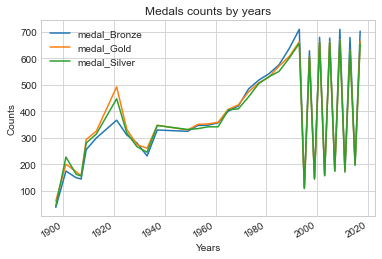

In [141]:
#Visualize
plt.figure()
df_periodic.plot()
plt.title("Medals counts by years")
plt.ylabel("Counts")
plt.xlabel("Years")
plt.show()

## Medal counts by years and seasons

In [167]:
summer = df_time[df_time.season == "Summer"]
winter = df_time[df_time.season == "Winter"]

## SUMMER

In [168]:
df_periodic_summer = summer.resample("2A").sum()
df_periodic_summer.head()

,age,height,weight,medal_Bronze,medal_Gold,medal_Silver
date_time,,,,,,
1896-12-31,3420.2,24922.09,10400.97,38.0,62.0,43.0
1898-12-31,0.0,0.00,0.00,0.0,0.0,0.0
1900-12-31,16788.6,107440.91,45287.89,175.0,201.0,228.0
1902-12-31,0.0,0.00,0.00,0.0,0.0,0.0
1904-12-31,12815.4,86139.17,36124.78,150.0,173.0,163.0


In [169]:
df_periodic_summer = df_periodic_summer[~(df_periodic_summer == 0).any(axis=1)]
df_periodic_summer.drop(["age","height","weight"],inplace=True,axis=1)
df_periodic_summer.head()

,medal_Bronze,medal_Gold,medal_Silver
date_time,,,
1896-12-31,38.0,62.0,43.0
1900-12-31,175.0,201.0,228.0
1904-12-31,150.0,173.0,163.0
1906-12-31,145.0,157.0,156.0
1908-12-31,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

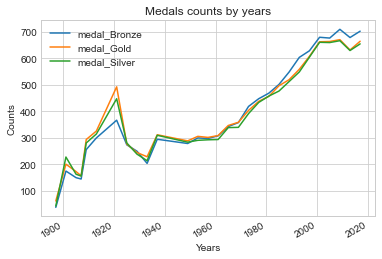

In [172]:
#Visualize
plt.figure()
df_periodic_summer.plot()
plt.title("Medals counts by years")
plt.ylabel("Counts")
plt.xlabel("Years")
plt.show()

## WİNTER

In [170]:
df_periodic_winter = winter.resample("2A").sum()
df_periodic_winter.head()

,age,height,weight,medal_Bronze,medal_Gold,medal_Silver
date_time,,,,,,
1924-12-31,3920.0,22867.28,9703.58,37,55,38
1926-12-31,0.0,0.00,0.00,0,0,0
1928-12-31,2265.6,15745.75,6862.50,31,30,28
1930-12-31,0.0,0.00,0.00,0,0,0
1932-12-31,2431.0,16357.71,7067.76,28,32,32


In [171]:
df_periodic_winter = df_periodic_winter[~(df_periodic_winter == 0).any(axis=1)]
df_periodic_winter.drop(["age","height","weight"],inplace=True,axis=1)
df_periodic_winter.head()

,medal_Bronze,medal_Gold,medal_Silver
date_time,,,
1924-12-31,37,55,38
1928-12-31,31,30,28
1932-12-31,28,32,32
1936-12-31,35,36,37
1948-12-31,46,41,48


<Figure size 432x288 with 0 Axes>

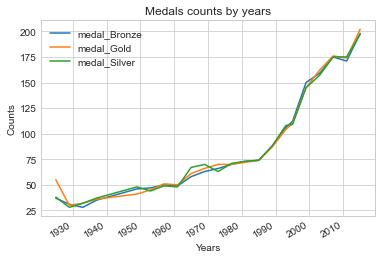

In [173]:
#Visualize
plt.figure()
df_periodic_winter.plot()
plt.title("Medals counts by years")
plt.ylabel("Counts")
plt.xlabel("Years")
plt.show()